# Trigonometric interpolation

In [1]:
using FundamentalsNumericalComputation

We get a cardinal function if we use data that is one at a node and zero at the others.

In [2]:
N = 7;  n = Int((N-1)/2);
t = OffsetArray( 2*(-n:n)/N, -n:n )
y = OffsetArray( zeros(N), -n:n )
y[0] = 1;

p = FNC.triginterp(t,y);

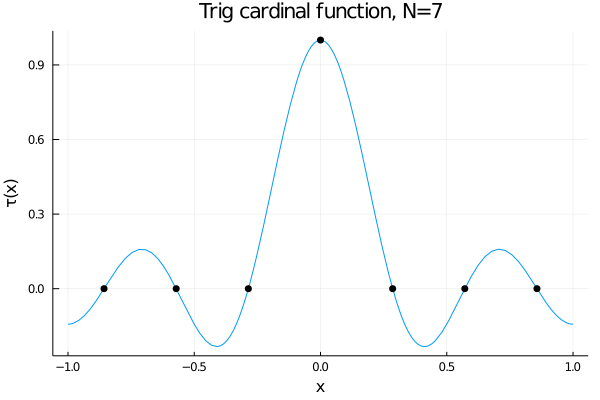

In [8]:
plot(p,-1,1)

scatter!(t,y,color=:black,
    xaxis=("x"),yaxis=("τ(x)"),title="Trig cardinal function, N=$N",leg=:none)

In [ ]:
Here is a 2-periodic function and one of its interpolants.

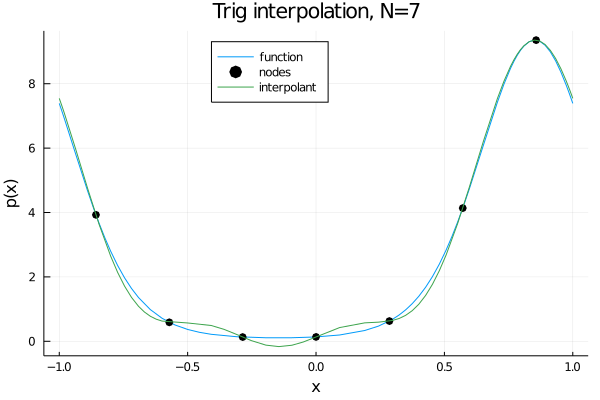

In [10]:
f = x -> exp(sin(pi*x)-2*cos(pi*x))
y = f.(t);  
p = FNC.triginterp(t,y);

plot(f,-1,1,label="function",
    xaxis=("x"), yaxis=("p(x)"),
    title="Trig interpolation, N=$N",leg=:top)  
scatter!(t,y,m=:o,color=:black,label="nodes")
plot!(p,-1,1,label="interpolant")

The convergence of the interpolant is exponential (spectral). We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes.

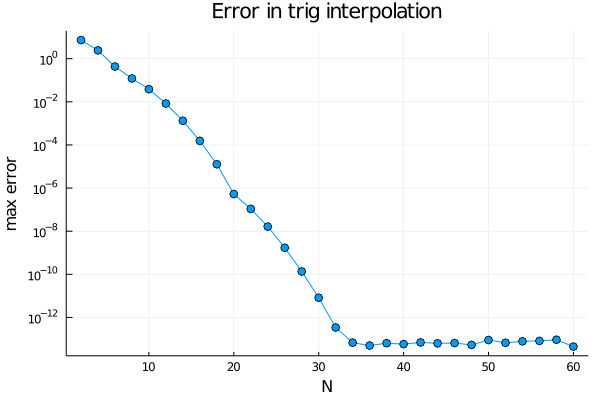

In [14]:
N = 2:2:60
err = zeros(size(N))

x = LinRange(-1,1,2501)  # for measuring error
for (k,N) = enumerate(N)
    n = (N-1)/2;   t = @. 2*(-n:n)/N;
    p = FNC.triginterp(t,f.(t))
    err[k] = maximum(@. abs(f(x)-p(x)) )
end

plot(N,err,m=:o,
    title="Error in trig interpolation",leg=:none,xaxis=("N"), yaxis=(:log10,"max error") )